In [125]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz  # 트리 그리기
import graphviz
# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# Over Sampling
from imblearn.over_sampling import SMOTE

# Check the Frequency of Variable
from collections import Counter

# 회기분석
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from datetime import datetime

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
# XGBOOST 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

#
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

# 스케일러
from sklearn.preprocessing import StandardScaler

#
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# 모델

# Tree
from sklearn.tree import DecisionTreeRegressor
# Tree - RandomForest
from sklearn.ensemble import RandomForestRegressor
# Tree - GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# Decision Tree - 분류 
from sklearn.tree import DecisionTreeClassifier
# Random Forest - 분류 
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting - 분류
from sklearn.ensemble import GradientBoostingClassifier
# XGBOOST - 분류
from xgboost import XGBClassifier
# SVM - 분류
from sklearn.svm import SVC
# NN (MLPClassifier) - 분류
from sklearn.neural_network import MLPClassifier
# KNN - 분류
from sklearn.neighbors import KNeighborsClassifier

# 선형회귀
from sklearn.linear_model import LinearRegression
# 로지스틱 선형회귀(2진분류)
from statsmodels.api import Logit

#시계열 - arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# 시계열 - auto arima
from pmdarima import auto_arima




import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + '/usr/bin'

%matplotlib inline

plt.rc('font', family = 'NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [126]:
# 데이터 불러오기 (대출면
df_a = pd.read_csv('/home/piai/바탕화면/보험/DataSet_대출.csv', encoding='euc-kr')
df_a.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT
0,1,0,1,0,0,0,9001,9001,9001,0,1,0,2,13,3,420001
1,2,0,1,0,0,0,24001,0,24001,0,0,0,2,121,0,0
2,3,0,0,1,3,2,15001,9001,0,3001,1,25,4,121,0,0
3,4,1,0,2,4,2,6001,3001,0,3001,1,25,4,61,0,0
4,5,0,4,0,0,0,21001,15001,21001,0,1,0,1,97,0,0


In [127]:
# 데이터 불러오기 (보험)
df_b = pd.read_csv('/home/piai/바탕화면/보험/DataSet_보험.csv', encoding='euc-kr')
df_b.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX
0,1,공무원,5400,7700,4,1,24.0,주부,0,0,...,20000000,20000000,0,0,10,0,0,0,50,1
1,2,자영업,5500,8100,4,2,29.0,주부,0,0,...,7000000,36000000,0,0,0,300000,2,5,50,1
2,3,주부,0,4900,4,1,34.0,2차산업 종사자,0,0,...,11000000,11000000,0,0,0,0,0,2,60,2
3,4,학생,0,10100,2,1,0.0,NaN,0,0,...,4000000,4000000,0,0,0,0,0,1,35,1
4,5,공무원,4800,4800,4,1,14.0,주부,0,0,...,4000000,4000000,0,0,0,500000,2,1,45,1


In [128]:
# 데이터 병합
df_merge = pd.merge(df_a, df_b, on='CUST_ID')

In [129]:
# 병합 후 컬럼명 확인
df_merge.columns

Index(['CUST_ID', 'TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT', 'CRDT_OCCR_MDIF', 'SPTCT_OCCR_MDIF', 'CRDT_CARD_CNT',
       'CTCD_OCCR_MDIF', 'CB_GUIF_CNT', 'CB_GUIF_AMT', 'OCCP_NAME_G',
       'CUST_JOB_INCM', 'HSHD_INFR_INCM', 'ACTL_FMLY_NUM', 'CUST_FMLY_NUM',
       'LAST_CHLD_AGE', 'MATE_OCCP_NAME_G', 'MATE_JOB_INCM', 'CRDT_LOAN_CNT',
       'MIN_CNTT_DATE', 'TOT_CRLN_AMT', 'TOT_REPY_AMT', 'CRLN_OVDU_RATE',
       'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE', 'STRT_CRDT_GRAD',
       'LTST_CRDT_GRAD', 'PREM_OVDU_RATE', 'LT1Y_PEOD_RATE', 'AVG_STLN_RATE',
       'STLN_REMN_AMT', 'LT1Y_STLN_AMT', 'LT1Y_SLOD_RATE', 'GDINS_MON_PREM',
       'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM', 'FMLY_SVINS_MNPREM',
       'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM', 'CNTT_LAMT_CNT',
       'LT1Y_CTLT_CNT', 'AUTR_FAIL_MCNT', 'FYCM_PAID_AMT', 'FMLY_CLAM_CNT',
       'FMLY_PLPY_CNT', 'AGE', 'SEX'],
      d

In [130]:
# 정보 확인
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100233 entries, 0 to 100232
Data columns (total 54 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CUST_ID            100233 non-null  int64  
 1   TARGET             100233 non-null  int64  
 2   BNK_LNIF_CNT       100233 non-null  int64  
 3   CPT_LNIF_CNT       100233 non-null  int64  
 4   SPART_LNIF_CNT     100233 non-null  int64  
 5   ECT_LNIF_CNT       100233 non-null  int64  
 6   TOT_LNIF_AMT       100233 non-null  int64  
 7   TOT_CLIF_AMT       100233 non-null  int64  
 8   BNK_LNIF_AMT       100233 non-null  int64  
 9   CPT_LNIF_AMT       100233 non-null  int64  
 10  CRDT_OCCR_MDIF     100233 non-null  int64  
 11  SPTCT_OCCR_MDIF    100233 non-null  int64  
 12  CRDT_CARD_CNT      100233 non-null  int64  
 13  CTCD_OCCR_MDIF     100233 non-null  int64  
 14  CB_GUIF_CNT        100233 non-null  int64  
 15  CB_GUIF_AMT        100233 non-null  int64  
 16  OC

In [131]:
# 결측치 확인
df_merge.isnull().sum()

CUST_ID                  0
TARGET                   0
BNK_LNIF_CNT             0
CPT_LNIF_CNT             0
SPART_LNIF_CNT           0
ECT_LNIF_CNT             0
TOT_LNIF_AMT             0
TOT_CLIF_AMT             0
BNK_LNIF_AMT             0
CPT_LNIF_AMT             0
CRDT_OCCR_MDIF           0
SPTCT_OCCR_MDIF          0
CRDT_CARD_CNT            0
CTCD_OCCR_MDIF           0
CB_GUIF_CNT              0
CB_GUIF_AMT              0
OCCP_NAME_G            464
CUST_JOB_INCM            0
HSHD_INFR_INCM           0
ACTL_FMLY_NUM            0
CUST_FMLY_NUM            0
LAST_CHLD_AGE         1027
MATE_OCCP_NAME_G     45709
MATE_JOB_INCM            0
CRDT_LOAN_CNT            0
MIN_CNTT_DATE            0
TOT_CRLN_AMT             0
TOT_REPY_AMT             0
CRLN_OVDU_RATE           0
CRLN_30OVDU_RATE         0
LT1Y_CLOD_RATE           0
STRT_CRDT_GRAD           0
LTST_CRDT_GRAD           0
PREM_OVDU_RATE           0
LT1Y_PEOD_RATE           0
AVG_STLN_RATE            0
STLN_REMN_AMT            0
L

OCCP_NAME_G            464 (직업)
LAST_CHLD_AGE         1027 (막내 나이)
MATE_OCCP_NAME_G     45709 (배우자 직업)

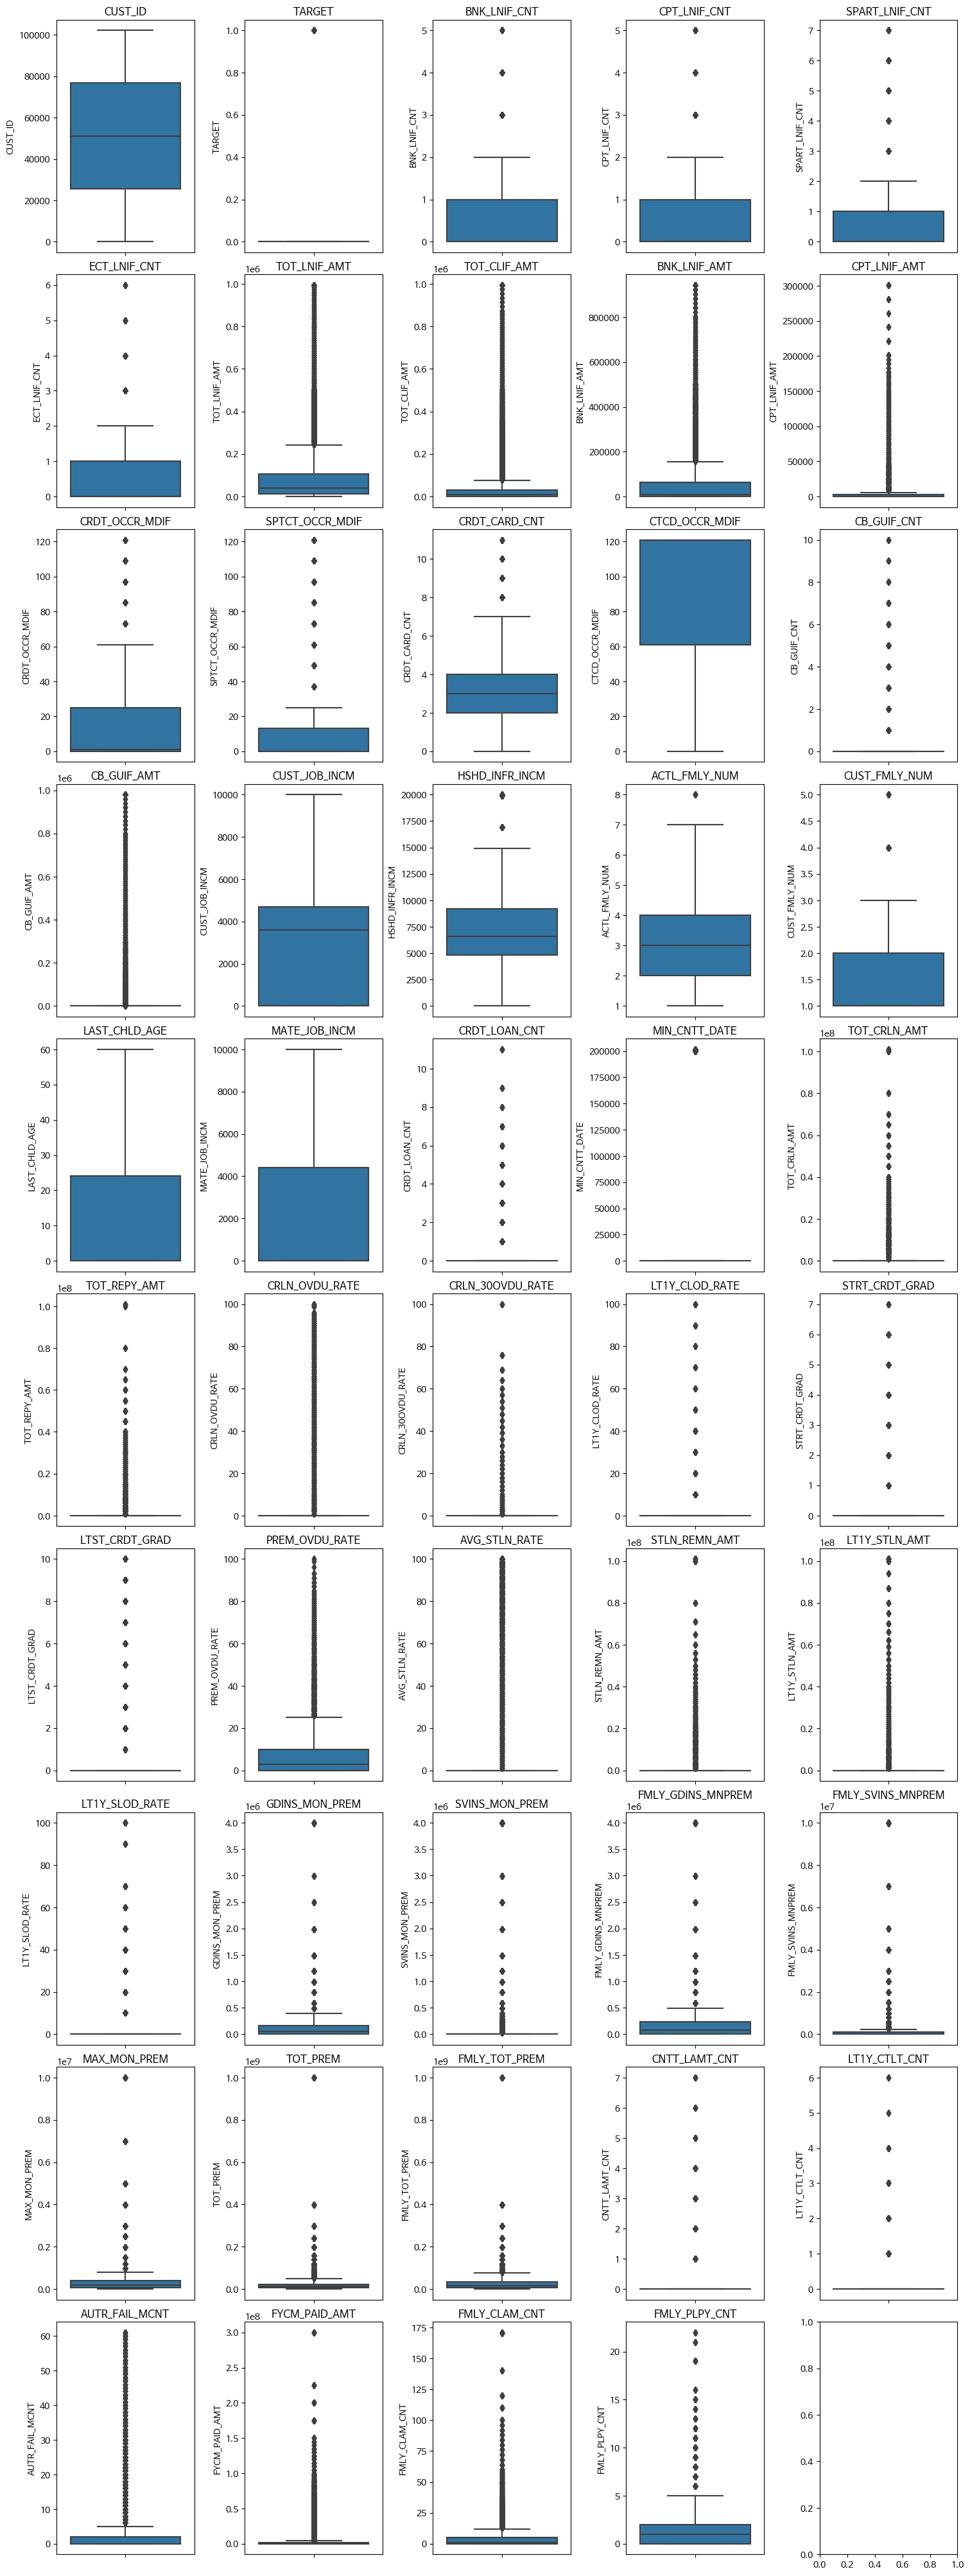

In [132]:
# 수치형 데이터 박스플롯으로 이상치 확인


# 데이터프레임 df_merge에서 이상치를 확인하고 싶은 숫자형 변수들을 선택
numeric_columns = df_merge.select_dtypes(include=['int64', 'float64']).columns

# 서브플롯 설정
fig, axes = plt.subplots(nrows=len(numeric_columns)//5 + 1, ncols=5, figsize=(15, 40), constrained_layout=True)

# 서브플롯에 박스플롯 그리기
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df_merge[col], ax=axes[i//5, i%5])  # 여기서 y=df_merge[col]로 수정
    axes[i//5, i%5].set_title(col)

plt.show()



* 그래프로 확인 불가
* 분석 진행하면서 이상한값들 처리하기로 결정

## 결측치 및 이상치

* OCCP_NAME_G            464 (직업)
* LAST_CHLD_AGE         1027 (막내 나이)
* MATE_OCCP_NAME_G     45709 (배우자 직업)

#### OCCP_NAME_G(직업) 결측치, 이상치 처리

In [133]:
df_merge['OCCP_NAME_G'].fillna('무응답', inplace=True)

In [134]:
df_merge['OCCP_NAME_G'].value_counts()

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
고소득 전문직      1223
*            1189
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
무응답           464
Name: OCCP_NAME_G, dtype: int64

In [135]:
df_merge['OCCP_NAME_G'].replace('*','무응답', inplace=True)

In [136]:
df_merge['OCCP_NAME_G'].value_counts()

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
무응답          1653
고소득 전문직      1223
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
Name: OCCP_NAME_G, dtype: int64

* OCCP_NAME_G(직업) 결측치를 '무응답'처리
* '*'값을 '무응답' 처리

#### MATE_OCCP_NAME_G(배우자 직업) 결측치, 이상치 처리

In [137]:
# 'MATE_JOB_INCM' 열이 0이 아니고 'MATE_OCCP_NAME_G' 열이 결측치인 행 선택
mask = (df_merge['MATE_JOB_INCM'] != 0) & (df_merge['MATE_OCCP_NAME_G'].isnull())

# 선택된 행의 'MATE_OCCP_NAME_G' 열을 '무응답'으로 채우기
df_merge.loc[mask, 'MATE_OCCP_NAME_G'] = '무응답'

# 나머지 'MATE_OCCP_NAME_G' 열의 결측치를 '배우자 없음'으로 채우기
df_merge['MATE_OCCP_NAME_G'].fillna('배우자 없음', inplace=True)

In [138]:
df_merge['MATE_OCCP_NAME_G'].value_counts()

배우자 없음      45349
주부          11683
사무직         10053
2차산업 종사자     8107
자영업          6380
3차산업 종사자     4011
운전직          2887
공무원          2400
전문직          2105
1차산업 종사자     1411
단순 사무직       1316
*            1027
기업/단체 임원      931
고소득 전문직       560
단순 노무직        549
기타            534
예체능계 종사자      461
무응답           360
학생            109
Name: MATE_OCCP_NAME_G, dtype: int64

* 결측치 중 360개를 무응답 처리

In [139]:
df_merge['MATE_OCCP_NAME_G'].replace('*','무응답', inplace=True)

In [140]:
df_merge['MATE_OCCP_NAME_G'].value_counts()

배우자 없음      45349
주부          11683
사무직         10053
2차산업 종사자     8107
자영업          6380
3차산업 종사자     4011
운전직          2887
공무원          2400
전문직          2105
1차산업 종사자     1411
무응답          1387
단순 사무직       1316
기업/단체 임원      931
고소득 전문직       560
단순 노무직        549
기타            534
예체능계 종사자      461
학생            109
Name: MATE_OCCP_NAME_G, dtype: int64

* '*'값을 '무응답' 처리

#### LAST_CHLD_AGE(막내나이) 결측값

In [141]:
# 결측값을 KNN보간법으로 처리하기 위하여 변수들간 상관관계 확인
df_merge.corr()['LAST_CHLD_AGE']

CUST_ID              0.001767
TARGET              -0.021266
BNK_LNIF_CNT        -0.007348
CPT_LNIF_CNT        -0.019383
SPART_LNIF_CNT       0.010164
ECT_LNIF_CNT         0.032922
TOT_LNIF_AMT         0.041163
TOT_CLIF_AMT         0.021346
BNK_LNIF_AMT         0.022599
CPT_LNIF_AMT        -0.009114
CRDT_OCCR_MDIF       0.066958
SPTCT_OCCR_MDIF      0.075368
CRDT_CARD_CNT        0.019596
CTCD_OCCR_MDIF       0.098527
CB_GUIF_CNT          0.022137
CB_GUIF_AMT          0.017837
CUST_JOB_INCM       -0.160491
HSHD_INFR_INCM       0.128827
ACTL_FMLY_NUM        0.611842
CUST_FMLY_NUM        0.207177
LAST_CHLD_AGE        1.000000
MATE_JOB_INCM        0.211298
CRDT_LOAN_CNT        0.138272
MIN_CNTT_DATE        0.162544
TOT_CRLN_AMT         0.120381
TOT_REPY_AMT         0.115229
CRLN_OVDU_RATE       0.125099
CRLN_30OVDU_RATE     0.035256
LT1Y_CLOD_RATE       0.027591
STRT_CRDT_GRAD       0.067917
LTST_CRDT_GRAD       0.096891
PREM_OVDU_RATE       0.076861
AVG_STLN_RATE        0.116409
STLN_REMN_

In [142]:
from sklearn.impute import KNNImputer

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5)

# 'LAST_CHLD_AGE'열과 'ACTL_FMLY_NUM'열을 선택하여 보간 수행
columns_to_interpolate = ['LAST_CHLD_AGE', 'ACTL_FMLY_NUM']
df_merge[columns_to_interpolate] = imputer.fit_transform(df_merge[columns_to_interpolate])

* CUST_FMLY_NUM(가족수) LAST_CHLD_AGE(막내나이)변수의 주변 5개 평균으로 결측처리 완료

#### AGE, SEX열 '*'값

In [143]:
df_merge[df_merge['AGE']== '*']['AGE'].count()

430

In [144]:
df_merge[df_merge['SEX']== '*']['SEX'].count()

430

* 일단 추후에 성별, 나이를 사용하는 분석 or 모델링에서는 '*'를 제외하고 사용하도록 하자
* 다른 컬럼의 값은 유효하므로 바로 제거하는 판단은 x

## 파생변수 생성

#### 양육기 변수 생성

In [145]:
# '양육기' 컬럼 추가 및 초기화
df_merge['양육기'] = 0

# 'LAST_CHLD_AGE'열과 'AGE'열 값의 크기를 비교하여 조건에 따라 '양육기' 컬럼에 값을 할당
df_merge.loc[df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1) <= 20, '양육기'] = 1
df_merge.loc[df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1) == 0, '양육기'] = 0

* 막내자녀가 20세 미만인 가입자 유무를 0/1로 표시

#### 양육기간 변수 생성

In [146]:
# '양육기간' 컬럼 추가 및 초기화
df_merge['양육기간'] = 0

# 'LAST_CHLD_AGE'열과 'AGE'열 값의 크기를 비교하여 조건에 따라 '양육기간' 컬럼에 값을 할당
df_merge['양육기간'] = df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1)
df_merge['양육기간'] = df_merge['양육기간'].apply(lambda x: 30 - x if x <= 30 else 0)
df_merge.loc[df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1) == 0, '양육기간'] = 0

* 보험사에서 보험계약기준으로 사용하는 30세를 기준으로 계약을 얼마나 할 수 있는나 30-막내나이 변수를 생성

In [147]:
df_merge

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,0,10,0,0,0,50,1,0,6.0
1,2,0,1,0,0,0,24001,0,24001,0,...,0,0,0,300000,2,5,50,1,0,1.0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,0,0,0,2,60,2,0,0.0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,0,0,0,1,35,1,0,0.0
4,5,0,4,0,0,0,21001,15001,21001,0,...,0,0,0,500000,2,1,45,1,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,0,0,1,700000,0,3,55,2,0,0.0
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,0,0,0,100000,0,3,45,2,1,11.0
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,0,0,1,0,0,4,45,1,1,16.0
100231,102251,0,0,0,1,1,57001,0,0,0,...,0,0,0,0,0,0,45,1,0,0.0


In [148]:
df_merge.isnull().sum()

CUST_ID              0
TARGET               0
BNK_LNIF_CNT         0
CPT_LNIF_CNT         0
SPART_LNIF_CNT       0
ECT_LNIF_CNT         0
TOT_LNIF_AMT         0
TOT_CLIF_AMT         0
BNK_LNIF_AMT         0
CPT_LNIF_AMT         0
CRDT_OCCR_MDIF       0
SPTCT_OCCR_MDIF      0
CRDT_CARD_CNT        0
CTCD_OCCR_MDIF       0
CB_GUIF_CNT          0
CB_GUIF_AMT          0
OCCP_NAME_G          0
CUST_JOB_INCM        0
HSHD_INFR_INCM       0
ACTL_FMLY_NUM        0
CUST_FMLY_NUM        0
LAST_CHLD_AGE        0
MATE_OCCP_NAME_G     0
MATE_JOB_INCM        0
CRDT_LOAN_CNT        0
MIN_CNTT_DATE        0
TOT_CRLN_AMT         0
TOT_REPY_AMT         0
CRLN_OVDU_RATE       0
CRLN_30OVDU_RATE     0
LT1Y_CLOD_RATE       0
STRT_CRDT_GRAD       0
LTST_CRDT_GRAD       0
PREM_OVDU_RATE       0
LT1Y_PEOD_RATE       0
AVG_STLN_RATE        0
STLN_REMN_AMT        0
LT1Y_STLN_AMT        0
LT1Y_SLOD_RATE       0
GDINS_MON_PREM       0
SVINS_MON_PREM       0
FMLY_GDINS_MNPREM    0
FMLY_SVINS_MNPREM    0
MAX_MON_PRE

# <신용등급 예측 모델링>

In [149]:
import matplotlib

# 맑은 고딕 적용
matplotlib.rc("font", family = "NanumBarunGothic")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

In [150]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

# 1. 의사결정나무(Regressor)

In [151]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

1. DecisionTreeClassifier: 이를 사용하는 경우는 LTST_CRDT_GRAD가 순서나 순위를 나타내지 않는 순수한 범주형 데이터일 때입니다. 예를 들어, 각 숫자가 다른 카테고리를 대표하고, 그 사이에 순서나 등급이 없는 경우에 해당합니다.

2. DecisionTreeRegressor: 이를 사용하는 경우는 LTST_CRDT_GRAD가 실제로 순위나 등급을 나타내는 순서형 데이터일 때 적합합니다. 예를 들어, 0이 가장 낮은 신용등급을 나타내고 10이 가장 높은 신용등급을 나타내는 경우 등 숫자에 실제로 순서가 있어 값이 높거나 낮은 것이 의미가 있을 때입니다.

In [152]:
#최근신용등급(LTST_CRDT_GRAD)
df_merge['LTST_CRDT_GRAD'].unique()

array([ 0,  4,  5,  6,  7,  9,  8,  2,  3, 10,  1])

In [153]:
df_merge.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,0,10,0,0,0,50,1,0,6.0
1,2,0,1,0,0,0,24001,0,24001,0,...,0,0,0,300000,2,5,50,1,0,1.0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,0,0,0,2,60,2,0,0.0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,0,0,0,1,35,1,0,0.0
4,5,0,4,0,0,0,21001,15001,21001,0,...,0,0,0,500000,2,1,45,1,1,16.0


In [154]:
# 범주형 변수의 Dummy 변수화
df_raw_dummy = pd.get_dummies(df_merge)
df_raw_dummy.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,AGE_40,AGE_45,AGE_50,AGE_55,AGE_60,AGE_65,AGE_70,SEX_*,SEX_1,SEX_2
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,0,1,0,0,0,0,0,1,0
1,2,0,1,0,0,0,24001,0,24001,0,...,0,0,1,0,0,0,0,0,1,0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,0,0,1,0,0,0,0,1
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,0,0,0,0,0,0,1,0
4,5,0,4,0,0,0,21001,15001,21001,0,...,0,1,0,0,0,0,0,0,1,0


In [155]:
# 목표변수, 설명변수 데이터 지정
columns_to_drop = ['CUST_ID', 'TARGET']
df_raw_y = df_raw_dummy["LTST_CRDT_GRAD"]
df_raw_x = df_raw_dummy.drop(["LTST_CRDT_GRAD"]+columns_to_drop, axis = 1, inplace = False)

In [156]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (70163, 107)
train data Y size : (70163,)
test data X size : (30070, 107)
test data Y size : (30070,)


In [157]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.653


In [158]:
tree_uncustomized.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

* min_samples_leaf

In [159]:
#train 및 test 설명력 결과 저장
train_score = []; test_score = []
#min_samples_leaf: 잎사귀 최소 자료수
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234
                                , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
#결과저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [160]:
df_score_leaf

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000000,0.653182
1,2,0.981753,0.682106
2,3,0.965195,0.697071
3,4,0.952085,0.723139
4,5,0.937843,0.726108
5,6,0.927588,0.742845
6,7,0.917262,0.752923
7,8,0.907632,0.747041
8,9,0.903157,0.755917
9,10,0.898032,0.754783


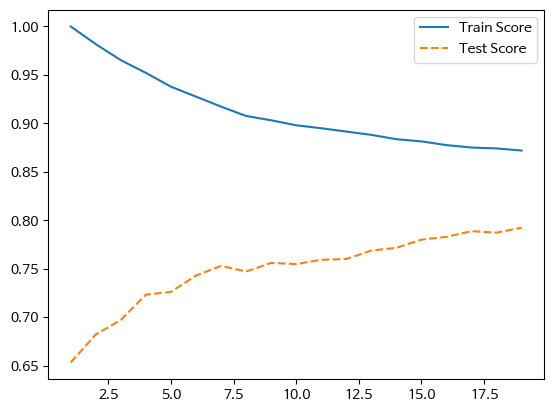

In [161]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

* 잎사귀 노드 최소 자료 수 증가에 따라 모델의 설명력이 감소하며, 
* Train/test 데이터의 성능 변화를 고려해 7선택
* test 데이터의 성능 변화를 고려하면 17선택 가능하지만, 이 경우 train 데이터 성능이 많이 저하됨.

The model with min_samples_leaf == 17 likely has a higher bias but lower variance

Given the information, the model with min_samples_leaf == 17 and a test score of 0.8 seems like a better choice due to its higher test score (indicating better generalization) and potentially greater simplicity (which helps with interpretability and robustness).

>> min_samples_leaf = 17

In [162]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=17
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

* min_samples_split

In [163]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.875,0.789
1,6,0.875,0.789
2,8,0.875,0.789
3,10,0.875,0.789
4,12,0.875,0.789
5,14,0.875,0.789
6,16,0.875,0.789
7,18,0.875,0.789
8,20,0.875,0.789
9,22,0.875,0.789


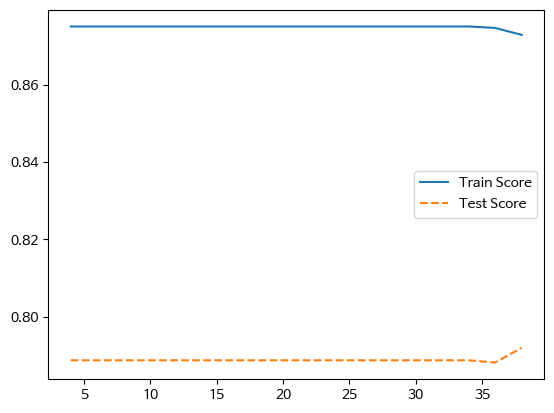

In [164]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

'min_samples_split = 38을 선택하면 가장 높은 테스트 점수 0.792를 얻을 수 있으며, 훈련 점수도 0.873으로 높게 유지되는 것이 약간의 일반화 개선

권장 사항은 min_samples_split = 38을 선택하는 것입니다. 이는 테스트 점수를 약간 향상시키면서도 높은 훈련 점수를 유지하고, 모델의 해석성에도 도움이 되며, 훈련 데이터에 과적합되는 것을 방지

>> min_samples_split = 38

In [165]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=17, min_samples_split=38
                                  , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

* max_depth

In [166]:
#  모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.584,0.588
1,2,0.687,0.685
2,3,0.735,0.722
3,4,0.778,0.772
4,5,0.806,0.793
5,6,0.825,0.797
6,7,0.835,0.800
7,8,0.844,0.800
8,9,0.853,0.803
9,10,0.863,0.799


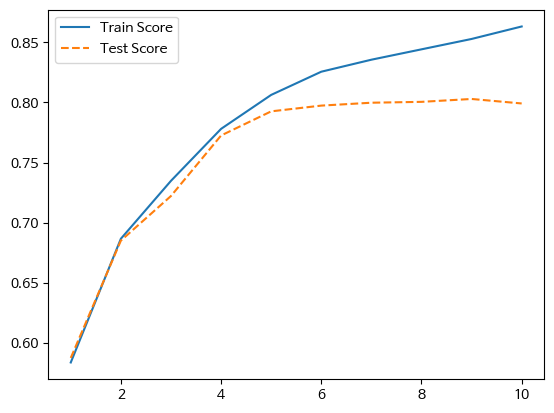

In [167]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

훈련 점수는 깊이 9일 때 더 높지만, 테스트 점수는 비슷합니다. 이는 깊이 9인 모델이 훈련 데이터에 더 잘 맞지만, 일반화 성능은 깊이 5인 모델과 큰 차이가 없음

과적합을 피하고 모델의 간단함을 유지하고자 한다면 깊이 5가 더 적합
 
>> max_depth = 5

<최종모델 선정>

In [168]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(min_samples_leaf = 17, min_samples_split = 38,
                                   max_depth = 5, random_state=1234, )
tree_final.fit(df_train_x, df_train_y)
tree_final.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 17,
 'min_samples_split': 38,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [169]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = tree_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 84502    0
88486    0
29874    0
93236    0
90208    0
82290    0
37088    0
63098    7
19588    5
87749    0
Name: LTST_CRDT_GRAD, dtype: int64
test data의 예측값 : 
 [1.89086554e-04 1.89086554e-04 1.89086554e-04 1.89086554e-04
 1.89086554e-04 1.89086554e-04 1.89086554e-04 6.85209003e+00
 5.34806630e+00 1.89086554e-04]


<최종모델 시각화>

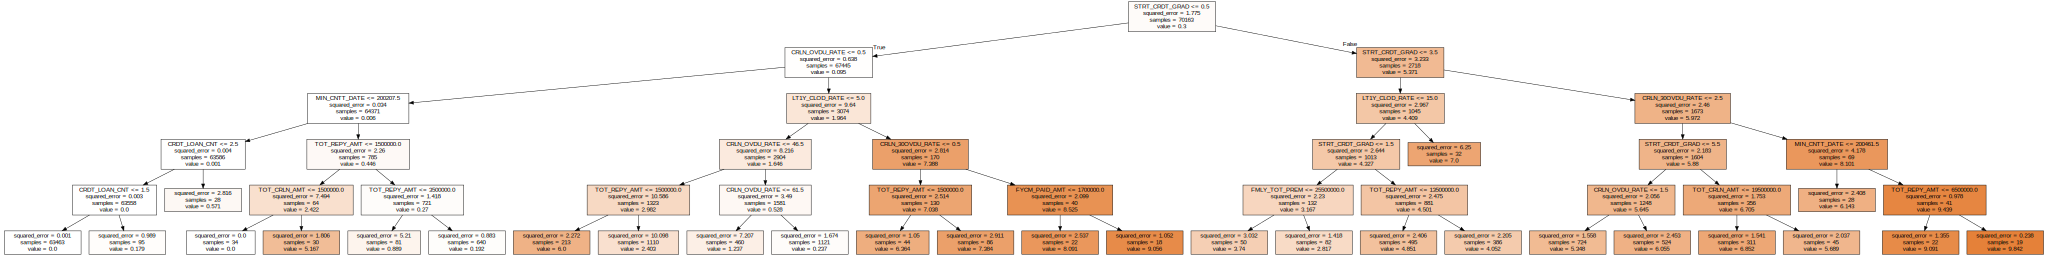

<Figure size 700x700 with 0 Axes>

In [170]:
export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
plt.figure(figsize = (7, 7))
display(graphviz.Source(dot_graph))

> 트리분리에 영향이 큰 변수: 최초신용등급(STRT_CRDT_GRAD), 신용대출연체율(CRLN_OVDU_RATE), 최초대출날짜(MIN_CNTT_DATE), 30일이내신용대출연체율(CRLN_30OVDU_RATE) 등

* 결론 도출: 설명변수의 중요도

In [171]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
27,STRT_CRDT_GRAD,0.745
24,CRLN_OVDU_RATE,0.160
26,LT1Y_CLOD_RATE,0.055
23,TOT_REPY_AMT,0.028
22,TOT_CRLN_AMT,0.005
...,...,...
38,TOT_PREM,0.000
37,MAX_MON_PREM,0.000
36,FMLY_SVINS_MNPREM,0.000
35,FMLY_GDINS_MNPREM,0.000


Text(0, 0.5, '변수')

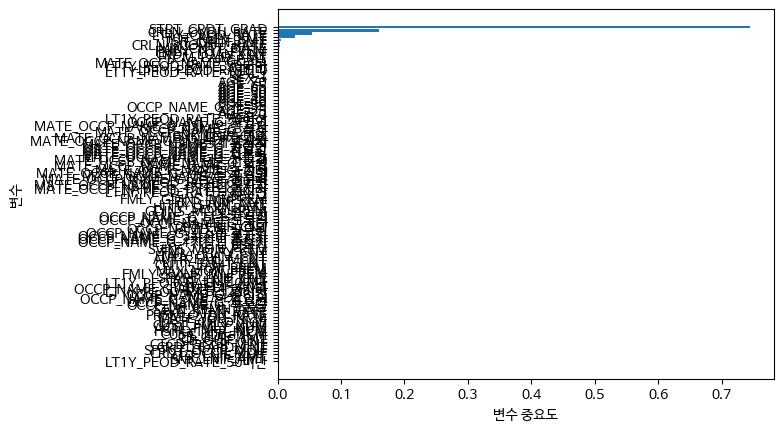

In [172]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

> 중요 설명변수: 최초신용등급(STRT_CRDT_GRAD), 신용대출연체율(CRLN_OVDU_RATE), 최근1년신용대출연체율(LT1Y_CLOD_RATE) 순으로 영향이 크다고 해석할 수 있음

In [173]:
from sklearn.metrics import mean_squared_error, r2_score

# 모델 훈련
tree_final.fit(df_train_x, df_train_y)

# 훈련 데이터에 대한 예측 및 성능 계산
train_pred = tree_final.predict(df_train_x)
train_mse = mean_squared_error(df_train_y, train_pred)
train_r2 = r2_score(df_train_y, train_pred)

# 테스트 데이터에 대한 예측 및 성능 계산
test_pred = tree_final.predict(df_test_x)
test_mse = mean_squared_error(df_test_y, test_pred)
test_r2 = r2_score(df_test_y, test_pred)

# 결과 출력
print(f"Train MSE: {train_mse:.3f}") #MSE(평균제곱오차): 작을수록 좋음. 0~무한대.
print(f"Train R^2: {train_r2:.3f}") #R^2(결정계수): 모델의 설명력을 본다. 0~1사이 값. 높을수록 모델의 데이터 설명력이 좋음. 
print(f"Test MSE: {test_mse:.3f}")
print(f"Test R^2: {test_r2:.3f}")

Train MSE: 0.344
Train R^2: 0.806
Test MSE: 0.340
Test R^2: 0.793


* MSE: 값은 0에 가까움 
* R^2: 값은 1에 가까움 
> 해당 모델의 예측값은 실제값과 유사하며, 데이터 설명력이 높다고 할 수 있다. 

# 1-2. 의사결정나무(Classifier)
- 신용등급 범주는 0부터 10까지. 카데고리가 너무 많아서 모델의 성능이 높게 나오지 않을 수 있다. 

==> 그러니까, 신용등급을 3~4개 카테고리로 구간화하는 파생변수를 하나 만들어서 DecisionTreeClassifier 돌리는 것 추천함.

(목표변수가 범주형이면 Classifier, 연속형이면 Regressor로 돌리는 게 일반적)

In [272]:
df_merge.shape

(100233, 57)

In [290]:
df_merge_new = df_merge.loc[df_merge['LTST_CRDT_GRAD'] > 0] #신용등급 == 0을 제외한 값들만 모아보기

In [291]:
df_merge_new.shape

(5273, 57)

In [294]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_merge_new)
df_raw_dummy.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,AGE_40,AGE_45,AGE_50,AGE_55,AGE_60,AGE_65,AGE_70,SEX_*,SEX_1,SEX_2
32,33,0,0,0,1,1,93001,93001,0,0,...,0,0,1,0,0,0,0,0,1,0
43,44,0,1,0,0,0,3001,3001,3001,0,...,0,0,1,0,0,0,0,0,0,1
64,65,0,1,0,0,0,3001,3001,3001,0,...,0,0,0,0,0,0,0,0,0,1
75,76,1,0,1,2,1,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
77,78,0,0,1,1,0,6001,6001,0,6001,...,0,0,1,0,0,0,0,0,0,1


In [295]:
# 데이터 분리:설명변수, 목표변수 구분
df_raw_x = df_raw_dummy.drop("LTST_CRDT_GRAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["LTST_CRDT_GRAD"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (5273, 110)
분할 후 설명변수 데이터 :Train (3691, 110)   Test (1582, 110)


In [296]:
display(df_merge.head(10))
display(df_raw_x.head(10))

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간,신용등급_구간화
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,10,0,0,0,50,1,0,6.0,0
1,2,0,1,0,0,0,24001,0,24001,0,...,0,0,300000,2,5,50,1,0,1.0,0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,0,0,2,60,2,0,0.0,0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,0,0,1,35,1,0,0.0,0
4,5,0,4,0,0,0,21001,15001,21001,0,...,0,0,500000,2,1,45,1,1,16.0,0
5,6,0,1,0,1,1,141001,27001,111001,0,...,0,0,300000,1,1,45,1,0,0.0,0
6,7,0,0,1,2,1,12001,3001,0,9001,...,0,1,800000,0,0,40,2,1,11.0,0
7,8,0,1,0,0,0,3001,3001,3001,0,...,0,0,0,0,1,60,1,0,6.0,0
8,9,0,2,0,0,0,273001,273001,273001,0,...,0,0,0,0,0,40,2,1,21.0,0
9,10,0,0,1,1,0,9001,9001,0,9001,...,0,21,300000,1,2,40,1,1,16.0,0


,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,AGE_40,AGE_45,AGE_50,AGE_55,AGE_60,AGE_65,AGE_70,SEX_*,SEX_1,SEX_2
32,33,0,0,0,1,1,93001,93001,0,0,...,0,0,1,0,0,0,0,0,1,0
43,44,0,1,0,0,0,3001,3001,3001,0,...,0,0,1,0,0,0,0,0,0,1
64,65,0,1,0,0,0,3001,3001,3001,0,...,0,0,0,0,0,0,0,0,0,1
75,76,1,0,1,2,1,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
77,78,0,0,1,1,0,6001,6001,0,6001,...,0,0,1,0,0,0,0,0,0,1
80,81,0,0,1,1,0,30001,30001,0,30001,...,0,0,0,0,1,0,0,0,0,1
87,88,0,2,0,0,0,105001,15001,105001,0,...,0,0,0,1,0,0,0,0,1,0
135,137,0,2,0,0,0,249001,0,249001,0,...,1,0,0,0,0,0,0,0,0,1
145,147,0,0,0,1,1,99001,99001,0,0,...,0,0,0,0,0,0,0,0,0,1
156,158,0,1,0,0,0,9001,0,9001,0,...,0,1,0,0,0,0,0,0,0,1


In [297]:
# Data 구조 확인
print("Data 구조:", df_raw_x.columns)
print()
print("변수 : ", df_train_x.columns)

Data 구조: Index(['CUST_ID', 'TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT',
       ...
       'AGE_40', 'AGE_45', 'AGE_50', 'AGE_55', 'AGE_60', 'AGE_65', 'AGE_70',
       'SEX_*', 'SEX_1', 'SEX_2'],
      dtype='object', length=110)

변수 :  Index(['CUST_ID', 'TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT',
       ...
       'AGE_40', 'AGE_45', 'AGE_50', 'AGE_55', 'AGE_60', 'AGE_65', 'AGE_70',
       'SEX_*', 'SEX_1', 'SEX_2'],
      dtype='object', length=110)


* 의사결정나무(DecisionTreeClassifier)_모델 생성

In [298]:
tree_uncust = DecisionTreeClassifier(random_state=1234 )
tree_uncust.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.478


In [299]:
# 실행옵션 확인
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


* n_estimators(생성 트리 수) 변경에 따른 모델 성능

In [300]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [301]:
para_n_tree

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [302]:
# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.991,0.468
1,20,0.999,0.513
2,30,1.000,0.538
3,40,1.000,0.535
4,50,1.000,0.535
5,60,1.000,0.536
6,70,1.000,0.534
7,80,1.000,0.538
8,90,1.000,0.535
9,100,1.000,0.540


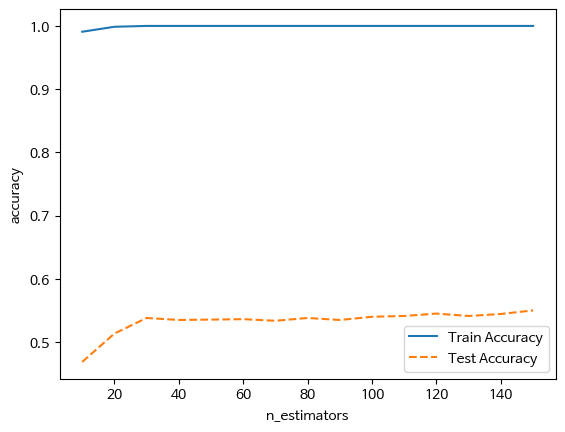

In [304]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

n_estimators: 트리의 개수 변경 시 모델의 oob error 변화

In [305]:
# error 저장 리스트
oob_error = []

for v_n_estimator in range(5, 121):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state= 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

Text(0.5, 0, 'n_estimators')

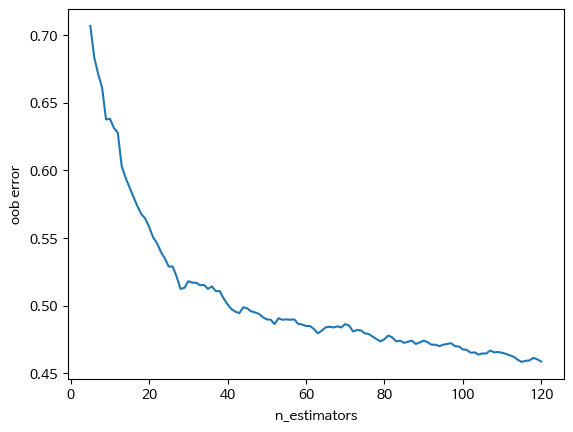

In [306]:
# 그래프로 표현
plt.plot(range(5, 121), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

>> n_estimators 지정: 150

*  max_depth(최대깊이) 변화에 따른 모델 성능

In [307]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경.
para_depth = [depth for depth in range(3, 12)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [308]:
para_depth

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [309]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.557,0.536
1,4,0.577,0.560
2,5,0.593,0.538
3,6,0.620,0.533
4,7,0.649,0.508
5,8,0.695,0.508
6,9,0.735,0.503
7,10,0.774,0.495
8,11,0.807,0.498


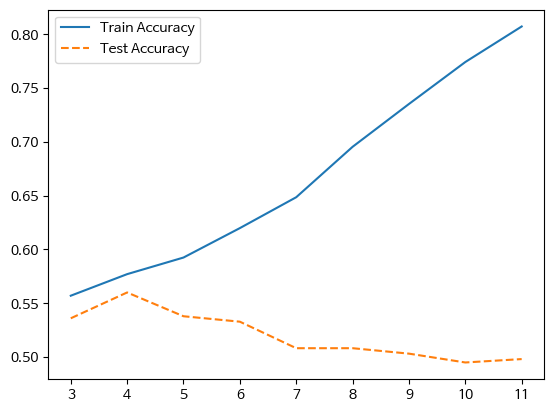

In [310]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

> max_depth(깊이) 지정 = 4

In [248]:
# 변수명 저장
v_feature_name = df_train_x.columns

* min_samples_split(분리노드의 최소 샘플 수) 조정에 따른 정확도 변화

In [249]:
# 참조:적정 자료 수 검토:Train Data 자료 수
print("전체 자료 = ", df_train_x.shape[0],"개")
print("전체 자료의 1% = ", df_train_x.shape[0] * 0.01,"개")

전체 자료 =  3691 개
전체 자료의 1% =  36.910000000000004 개


In [250]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(2, 16)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth=7, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [251]:
para_split

[20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [252]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.639,0.512
1,30,0.632,0.509
2,40,0.629,0.508
3,50,0.627,0.506
4,60,0.624,0.508
5,70,0.622,0.511
6,80,0.617,0.510
7,90,0.614,0.515
8,100,0.613,0.518
9,110,0.612,0.521


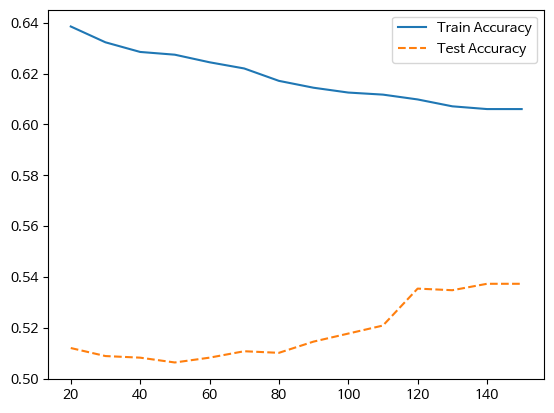

In [253]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

>> min_samples_split = 120

* min_samples_leaf(최소 잎사귀 수) 조정에 따른 정확도 변화

In [259]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,
                                max_depth=4, n_estimators=150, min_samples_split = 120, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [260]:
para_leaf

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [261]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.486,0.464
1,10,0.488,0.463
2,15,0.483,0.460
3,20,0.484,0.459
4,25,0.484,0.459
5,30,0.482,0.456
6,35,0.480,0.456
7,40,0.481,0.454
8,45,0.481,0.454
9,50,0.479,0.455


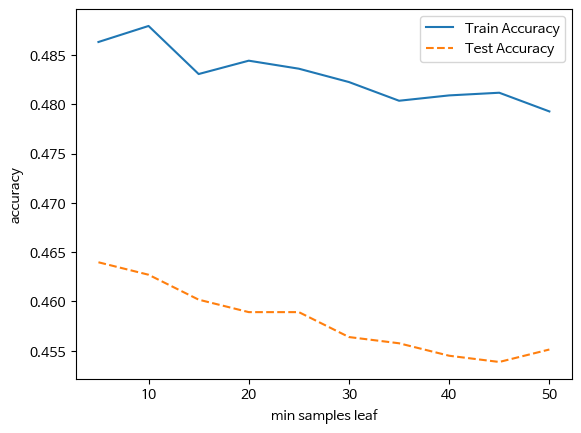

In [262]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

>> min_samples_leaf 지정: 5

* <최종모델>

In [263]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf=5, max_depth=4, n_estimators=150,
                                  random_state=1234)
rf_final.fit(df_train_x, df_train_y)
# 평가
y_pred = rf_final.predict(df_test_x)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.491
Accuracy on test set: 0.463

Confusion matrix: 
[[  0   0   0   4  11   0   0   0   0   0]
 [  0   0   0  27  63   0   0   0   0   0]
 [  0   0   0  12  69   0   0   0   0   0]
 [  0   0   0  36 209   0   0   0   0   0]
 [  0   0   0  26 318   0   0   0   0   0]
 [  0   0   0   0   0 370   0   0   0   0]
 [  0   0   0   0   0 210   0   0   0   0]
 [  0   0   0   0   0 117   0   0   0   0]
 [  0   0   0   0   0  48   0   0   0   1]
 [  0   0   0   0   0  52   0   0   0   9]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        15
           2      0.000     0.000     0.000        90
           3      0.000     0.000     0.000        81
           4      0.343     0.147     0.206       245
           5      0.475     0.924     0.627       344
           6      0.464     1.000     0.634       370
           7      0.000     0.000     0.000       210
           8      0.000     0.000     0.000       117
  

* 설명변수 중요도

In [264]:
# 변수명
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
50,신용등급_구간화,0.408
25,TOT_REPY_AMT,0.069
29,STRT_CRDT_GRAD,0.067
27,CRLN_30OVDU_RATE,0.058
26,CRLN_OVDU_RATE,0.040
...,...,...
75,MATE_OCCP_NAME_G_단순 노무직,0.000
71,MATE_OCCP_NAME_G_고소득 전문직,0.000
67,OCCP_NAME_G_학생,0.000
63,OCCP_NAME_G_운전직,0.000


Text(0, 0.5, '설명변수')

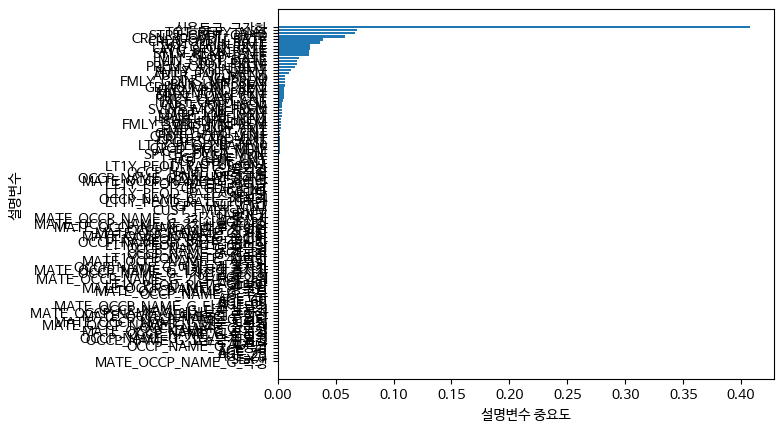

In [265]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

==> 설명변수 중요도는: TOT_REPY_AMT, STRT_CRDT_GRAD, CRLN_30OVDU_RATE 순으로 높게 나옴

In [266]:
from sklearn.metrics import mean_squared_error, r2_score

# 모델 훈련
tree_final.fit(df_train_x, df_train_y)

# 훈련 데이터에 대한 예측 및 성능 계산
train_pred = tree_final.predict(df_train_x)
train_mse = mean_squared_error(df_train_y, train_pred)
train_r2 = r2_score(df_train_y, train_pred)

# 테스트 데이터에 대한 예측 및 성능 계산
test_pred = tree_final.predict(df_test_x)
test_mse = mean_squared_error(df_test_y, test_pred)
test_r2 = r2_score(df_test_y, test_pred)

# 결과 출력
print(f"Train MSE: {train_mse:.3f}") #MSE(평균제곱오차): 작을수록 좋음. 0~무한대.
print(f"Train R^2: {train_r2:.3f}") #R^2(결정계수): 모델의 설명력을 본다. 0~1사이 값. 높을수록 모델의 데이터 설명력이 좋음. 
print(f"Test MSE: {test_mse:.3f}")
print(f"Test R^2: {test_r2:.3f}")

Train MSE: 0.434
Train R^2: 0.878
Test MSE: 0.451
Test R^2: 0.874


# 2. 랜덤포레스트

In [311]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_merge_new)
df_raw_dummy.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,AGE_40,AGE_45,AGE_50,AGE_55,AGE_60,AGE_65,AGE_70,SEX_*,SEX_1,SEX_2
32,33,0,0,0,1,1,93001,93001,0,0,...,0,0,1,0,0,0,0,0,1,0
43,44,0,1,0,0,0,3001,3001,3001,0,...,0,0,1,0,0,0,0,0,0,1
64,65,0,1,0,0,0,3001,3001,3001,0,...,0,0,0,0,0,0,0,0,0,1
75,76,1,0,1,2,1,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
77,78,0,0,1,1,0,6001,6001,0,6001,...,0,0,1,0,0,0,0,0,0,1


* 데이터 분리/분할

In [312]:
# 데이터 분리:설명변수, 목표변수 구분
df_raw_x = df_raw_dummy.drop("LTST_CRDT_GRAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["LTST_CRDT_GRAD"] 

# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (5273, 110)
분할 후 설명변수 데이터 :Train (3691, 110)   Test (1582, 110)


In [314]:
df_merge.head(10)

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간,신용등급_구간화
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,10,0,0,0,50,1,0,6.0,0
1,2,0,1,0,0,0,24001,0,24001,0,...,0,0,300000,2,5,50,1,0,1.0,0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,0,0,2,60,2,0,0.0,0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,0,0,1,35,1,0,0.0,0
4,5,0,4,0,0,0,21001,15001,21001,0,...,0,0,500000,2,1,45,1,1,16.0,0
5,6,0,1,0,1,1,141001,27001,111001,0,...,0,0,300000,1,1,45,1,0,0.0,0
6,7,0,0,1,2,1,12001,3001,0,9001,...,0,1,800000,0,0,40,2,1,11.0,0
7,8,0,1,0,0,0,3001,3001,3001,0,...,0,0,0,0,1,60,1,0,6.0,0
8,9,0,2,0,0,0,273001,273001,273001,0,...,0,0,0,0,0,40,2,1,21.0,0
9,10,0,0,1,1,0,9001,9001,0,9001,...,0,21,300000,1,2,40,1,1,16.0,0


In [315]:
df_raw_x.head(10)

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,AGE_40,AGE_45,AGE_50,AGE_55,AGE_60,AGE_65,AGE_70,SEX_*,SEX_1,SEX_2
32,33,0,0,0,1,1,93001,93001,0,0,...,0,0,1,0,0,0,0,0,1,0
43,44,0,1,0,0,0,3001,3001,3001,0,...,0,0,1,0,0,0,0,0,0,1
64,65,0,1,0,0,0,3001,3001,3001,0,...,0,0,0,0,0,0,0,0,0,1
75,76,1,0,1,2,1,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
77,78,0,0,1,1,0,6001,6001,0,6001,...,0,0,1,0,0,0,0,0,0,1
80,81,0,0,1,1,0,30001,30001,0,30001,...,0,0,0,0,1,0,0,0,0,1
87,88,0,2,0,0,0,105001,15001,105001,0,...,0,0,0,1,0,0,0,0,1,0
135,137,0,2,0,0,0,249001,0,249001,0,...,1,0,0,0,0,0,0,0,0,1
145,147,0,0,0,1,1,99001,99001,0,0,...,0,0,0,0,0,0,0,0,0,1
156,158,0,1,0,0,0,9001,0,9001,0,...,0,1,0,0,0,0,0,0,0,1


In [316]:
# Data 구조 확인
print("Data 구조:", df_raw_x.columns)
print()
print("변수 : ", df_train_x.columns)

Data 구조: Index(['CUST_ID', 'TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT',
       ...
       'AGE_40', 'AGE_45', 'AGE_50', 'AGE_55', 'AGE_60', 'AGE_65', 'AGE_70',
       'SEX_*', 'SEX_1', 'SEX_2'],
      dtype='object', length=110)

변수 :  Index(['CUST_ID', 'TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT',
       ...
       'AGE_40', 'AGE_45', 'AGE_50', 'AGE_55', 'AGE_60', 'AGE_65', 'AGE_70',
       'SEX_*', 'SEX_1', 'SEX_2'],
      dtype='object', length=110)


* 모델 생성

In [317]:
# 랜덤 포레스트 모델 생성: RandomForestClassifier
rf_uncust = RandomForestClassifier(random_state=1234)
rf_uncust.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.540


In [318]:
# 실행옵션 확인
print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 1234, 0, False])


* n_estimators(생성 트리 수) 변경에 따른 모델 성능

In [319]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [320]:
para_n_tree

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [321]:
# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.991,0.468
1,20,0.999,0.513
2,30,1.000,0.538
3,40,1.000,0.535
4,50,1.000,0.535
5,60,1.000,0.536
6,70,1.000,0.534
7,80,1.000,0.538
8,90,1.000,0.535
9,100,1.000,0.540


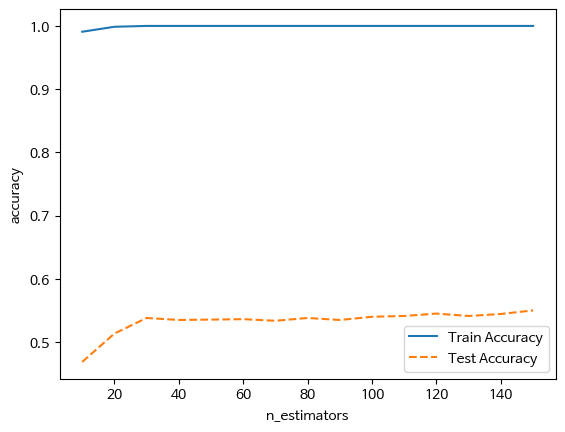

In [322]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

In [323]:
# error 저장 리스트
oob_error = []

for v_n_estimator in range(5, 121):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state= 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

Text(0.5, 0, 'n_estimators')

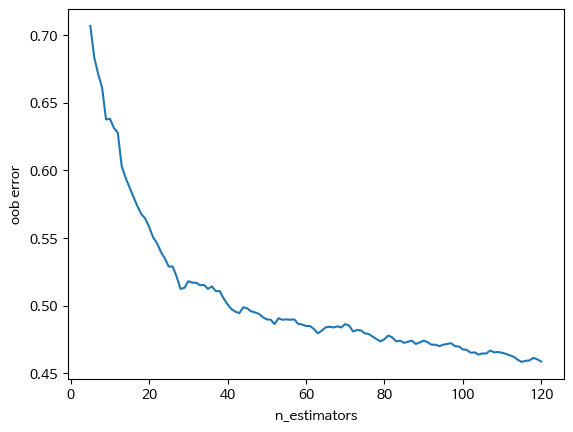

In [324]:
# 그래프로 표현
plt.plot(range(5, 121), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

> n_estimators = 150

* max_depth(최대 깊이) 조정에 따른 정확도 변화

In [325]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(3, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [326]:
para_depth

[3, 4, 5, 6, 7, 8, 9, 10]

In [327]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.474,0.456
1,4,0.493,0.468
2,5,0.510,0.475
3,6,0.548,0.479
4,7,0.606,0.499
5,8,0.664,0.509
6,9,0.738,0.507
7,10,0.811,0.513


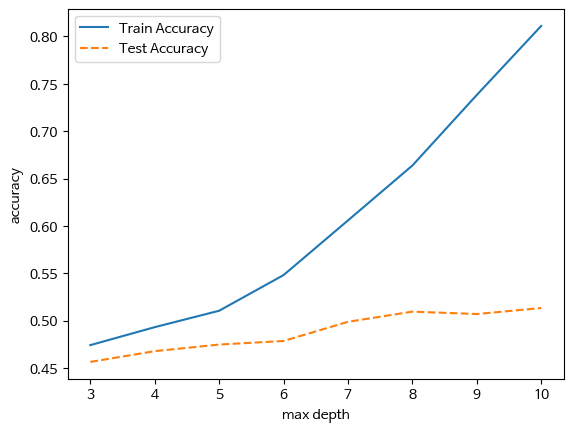

In [328]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

> max_depth 지정: 6

* min_samples_split(분할 노드의 최소 샘플 수) 조정에 따른 정확도 변화

In [329]:
# 참조:적정 자료 수 검토:Train Data 자료 수
print("전체 자료 = ", df_train_x.shape[0],"개")
print("전체 자료의 1% = ", df_train_x.shape[0] * 0.01,"개")

전체 자료 =  3691 개
전체 자료의 1% =  36.910000000000004 개


In [331]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수.
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth=6,
                                n_estimators=100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [332]:
para_split

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [333]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.543,0.479
1,20,0.539,0.479
2,30,0.532,0.480
3,40,0.528,0.479
4,50,0.524,0.475
5,60,0.525,0.475
6,70,0.519,0.475
7,80,0.520,0.476
8,90,0.518,0.475
9,100,0.520,0.472


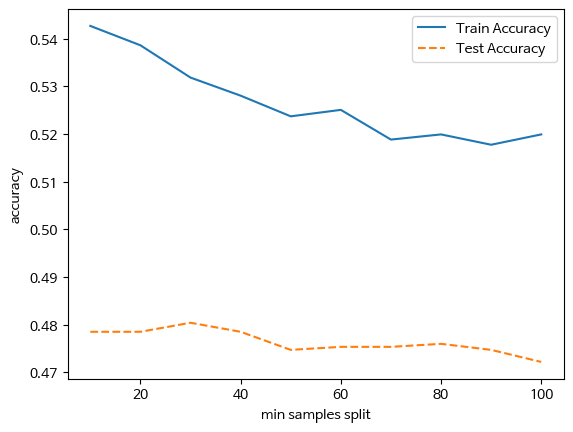

In [334]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

> min_samples_split = 30

* min_samples_leaf(최소 잎사귀 수) 조정에 따른 정확도 변화

In [335]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,
                                max_depth=6, n_estimators=100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [336]:
para_leaf

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [337]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.540,0.480
1,10,0.532,0.478
2,15,0.529,0.480
3,20,0.526,0.476
4,25,0.517,0.476
5,30,0.518,0.471
6,35,0.512,0.471
7,40,0.508,0.467
8,45,0.504,0.463
9,50,0.504,0.465


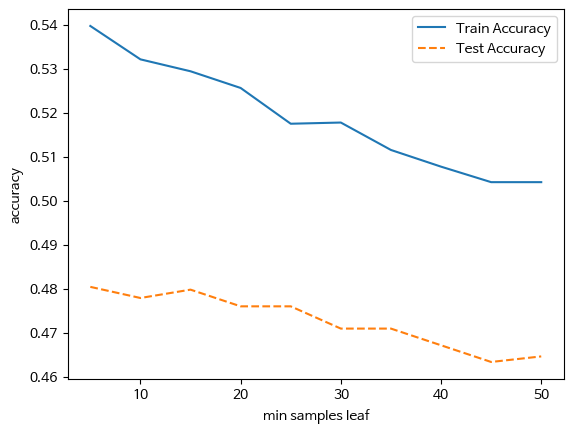

In [338]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

> min_samples_leaf 지정: 15

* 최종모델

In [339]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf=15, max_depth=6, n_estimators=150, min_samples_split=30, 
                                  random_state=1234)
rf_final.fit(df_train_x, df_train_y)
# 평가
y_pred = rf_final.predict(df_test_x)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.531
Accuracy on test set: 0.477

Confusion matrix: 
[[  0   0   0   5  10   0   0   0   0   0]
 [  0   0   0  40  50   0   0   0   0   0]
 [  0   0   0  19  62   0   0   0   0   0]
 [  0   0   0  51 194   0   0   0   0   0]
 [  0   0   0  35 309   0   0   0   0   0]
 [  0   0   0   0   0 370   0   0   0   0]
 [  0   0   0   0   0 210   0   0   0   0]
 [  0   0   0   0   0 117   0   0   0   0]
 [  0   0   0   0   0  41   0   0   0   8]
 [  0   0   0   0   0  36   0   0   0  25]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        15
           2      0.000     0.000     0.000        90
           3      0.000     0.000     0.000        81
           4      0.340     0.208     0.258       245
           5      0.494     0.898     0.638       344
           6      0.478     1.000     0.647       370
           7      0.000     0.000     0.000       210
           8      0.000     0.000     0.000       117
  

* 설명변수 중요도

In [340]:
# 변수명
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
50,신용등급_구간화,0.482
29,STRT_CRDT_GRAD,0.052
25,TOT_REPY_AMT,0.048
27,CRLN_30OVDU_RATE,0.043
26,CRLN_OVDU_RATE,0.030
...,...,...
74,MATE_OCCP_NAME_G_기타,0.000
75,MATE_OCCP_NAME_G_단순 노무직,0.000
85,MATE_OCCP_NAME_G_학생,0.000
76,MATE_OCCP_NAME_G_단순 사무직,0.000


Text(0, 0.5, '설명변수')

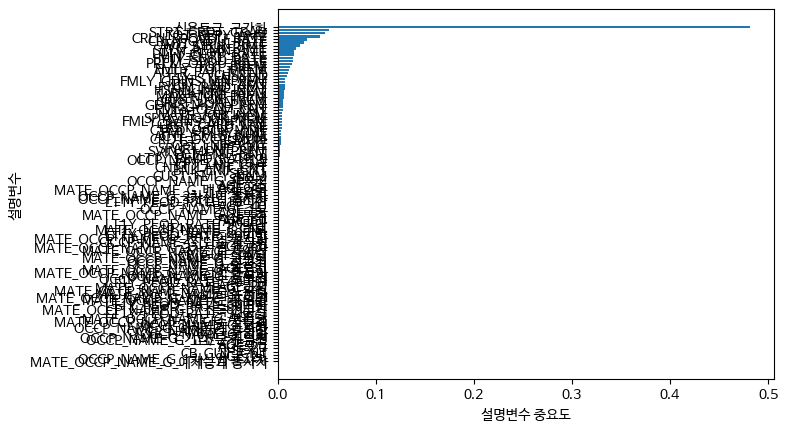

In [341]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

==> 설명변수 중요도는: STRT_CRDT_GRAD, TOT_REPY_AMT, CRLN_30OVDU_RATE 순으로 높게 나옴

# 그래디언트 부스팅

In [346]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_merge_new)
df_raw_dummy.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,AGE_40,AGE_45,AGE_50,AGE_55,AGE_60,AGE_65,AGE_70,SEX_*,SEX_1,SEX_2
32,33,0,0,0,1,1,93001,93001,0,0,...,0,0,1,0,0,0,0,0,1,0
43,44,0,1,0,0,0,3001,3001,3001,0,...,0,0,1,0,0,0,0,0,0,1
64,65,0,1,0,0,0,3001,3001,3001,0,...,0,0,0,0,0,0,0,0,0,1
75,76,1,0,1,2,1,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
77,78,0,0,1,1,0,6001,6001,0,6001,...,0,0,1,0,0,0,0,0,0,1


In [347]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop("LTST_CRDT_GRAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["LTST_CRDT_GRAD"]

In [348]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (5273, 110)
분할 후 설명변수 데이터 :Train (3691, 110)   Test (1582, 110)


In [350]:
display(df_merge.head(10))
display(df_raw_x.head(10))

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간,신용등급_구간화
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,10,0,0,0,50,1,0,6.0,0
1,2,0,1,0,0,0,24001,0,24001,0,...,0,0,300000,2,5,50,1,0,1.0,0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,0,0,2,60,2,0,0.0,0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,0,0,1,35,1,0,0.0,0
4,5,0,4,0,0,0,21001,15001,21001,0,...,0,0,500000,2,1,45,1,1,16.0,0
5,6,0,1,0,1,1,141001,27001,111001,0,...,0,0,300000,1,1,45,1,0,0.0,0
6,7,0,0,1,2,1,12001,3001,0,9001,...,0,1,800000,0,0,40,2,1,11.0,0
7,8,0,1,0,0,0,3001,3001,3001,0,...,0,0,0,0,1,60,1,0,6.0,0
8,9,0,2,0,0,0,273001,273001,273001,0,...,0,0,0,0,0,40,2,1,21.0,0
9,10,0,0,1,1,0,9001,9001,0,9001,...,0,21,300000,1,2,40,1,1,16.0,0


,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,AGE_40,AGE_45,AGE_50,AGE_55,AGE_60,AGE_65,AGE_70,SEX_*,SEX_1,SEX_2
32,33,0,0,0,1,1,93001,93001,0,0,...,0,0,1,0,0,0,0,0,1,0
43,44,0,1,0,0,0,3001,3001,3001,0,...,0,0,1,0,0,0,0,0,0,1
64,65,0,1,0,0,0,3001,3001,3001,0,...,0,0,0,0,0,0,0,0,0,1
75,76,1,0,1,2,1,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
77,78,0,0,1,1,0,6001,6001,0,6001,...,0,0,1,0,0,0,0,0,0,1
80,81,0,0,1,1,0,30001,30001,0,30001,...,0,0,0,0,1,0,0,0,0,1
87,88,0,2,0,0,0,105001,15001,105001,0,...,0,0,0,1,0,0,0,0,1,0
135,137,0,2,0,0,0,249001,0,249001,0,...,1,0,0,0,0,0,0,0,0,1
145,147,0,0,0,1,1,99001,99001,0,0,...,0,0,0,0,0,0,0,0,0,1
156,158,0,1,0,0,0,9001,0,9001,0,...,0,1,0,0,0,0,0,0,0,1


In [351]:
# Data 구조 확인
print("Data 구조:", df_raw_x.columns)
print()
print("변수 : ", df_train_x.columns)

Data 구조: Index(['CUST_ID', 'TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT',
       ...
       'AGE_40', 'AGE_45', 'AGE_50', 'AGE_55', 'AGE_60', 'AGE_65', 'AGE_70',
       'SEX_*', 'SEX_1', 'SEX_2'],
      dtype='object', length=110)

변수 :  Index(['CUST_ID', 'TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT',
       ...
       'AGE_40', 'AGE_45', 'AGE_50', 'AGE_55', 'AGE_60', 'AGE_65', 'AGE_70',
       'SEX_*', 'SEX_1', 'SEX_2'],
      dtype='object', length=110)


* <모델 생성>

In [352]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on training set: 0.817
Accuracy on test set: 0.561


In [353]:
# 실행옵션 확인
print(gb_uncust.get_params().keys())
print(gb_uncust.get_params().values())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values([0.0, 'friedman_mse', None, 0.1, 'log_loss', 3, None, None, 0.0, 1, 2, 0.0, 100, None, 1234, 1.0, 0.0001, 0.1, 0, False])


* learning_rate(학습률) 변화에 따른 모델 성능

In [354]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]
# para_lr = [lr * 0.02 for lr in range(1, 20)]   # 민감하게 변화하면 0.02 간격으로 확인

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

In [355]:
para_lr

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [356]:
# LearningRate별 정확도 
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.817,0.561
1,0.2,0.926,0.552
2,0.3,0.976,0.547
3,0.4,0.860,0.534
4,0.5,0.731,0.513
5,0.6,0.808,0.503
6,0.7,0.953,0.504
7,0.8,0.812,0.504
8,0.9,0.952,0.506


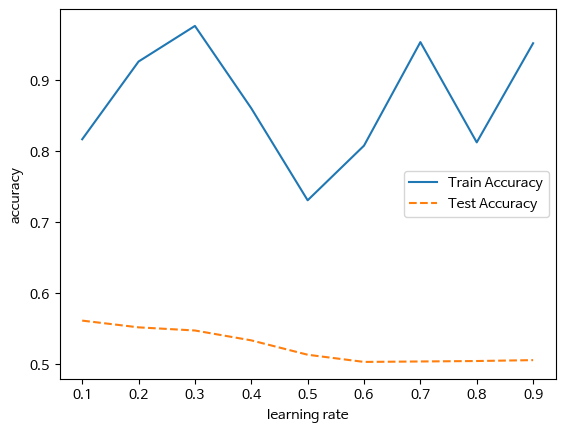

In [357]:
# LearningRate별 정확도 그래프 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

> 학습률(learning rate) 지정 : 0.1

* n_estimators: 트리의 개수 변경에 따른 모델 성능

In [358]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [ ]:
para_n_tree

In [ ]:
# n_estimators별 정확도 
df_accuracy_n.round(3)

In [ ]:
# 정확도를 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

> 트리 수 지정 :100

* 

* n_estimators: 트리의 개수 변경에 따른 모델 성능

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [ ]:
para_n_tree

In [ ]:
# n_estimators별 정확도 
df_accuracy_n.round(3)

In [ ]:
# 정확도를 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

> 트리 수 지정 :100

* max_depth: 최대 깊이 변경에 따른 모델 성능

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                            n_estimators=100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

# XGBoost

In [342]:
!pip install xgboost

In [343]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [344]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier(random_state=1234)

xgboost_uncust
# xgboost_uncust.get_params()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...)

In [345]:
# 모델 적합
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(df_train_x)
# 모델 평가
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(df_test_x)
# 모델 평가
eval_class_model(df_test_y, xgb_pred_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8 9], got [ 1  2  3  4  5  6  7  8  9 10]